In [1]:
import tensorflow as tf
import numpy as np
# from sklearn.model_selection import train_test_split
# import pandas as pd
import csv
import matplotlib.pyplot as plt

2024-11-01 23:05:10.417118: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-01 23:05:10.452498: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-01 23:05:10.984176: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Reading Data with Pandas

In [6]:
# training_data=pd.read_csv('fashion-mnist_train.csv')
# testing_data=pd.read_csv('fashion-mnist_test.csv')

## Reading Data with CSV

In [3]:
images=[]
labels=[]

with open('fashion-mnist_train.csv','r',encoding='utf8') as data:
    df = csv.reader(data)
    next(df)
    for row in df:
        images.append(row[1:])
        labels.append(row[0])
train_data = np.array(images,dtype='float32')
train_labels = np.array(labels,dtype='float32')

In [4]:
train_data.shape

(60000, 784)

In [5]:
test_images=[]
test_labels=[]

with open('fashion-mnist_test.csv','r',encoding='utf8') as data:
    df = csv.reader(data)
    next(df)
    for row in df:
        test_images.append(row[1:])
        test_labels.append(row[0])
test_data = np.array(test_images,dtype='float32')
test_labels = np.array(test_labels,dtype='float32')

In [6]:
test_data.shape

(10000, 784)

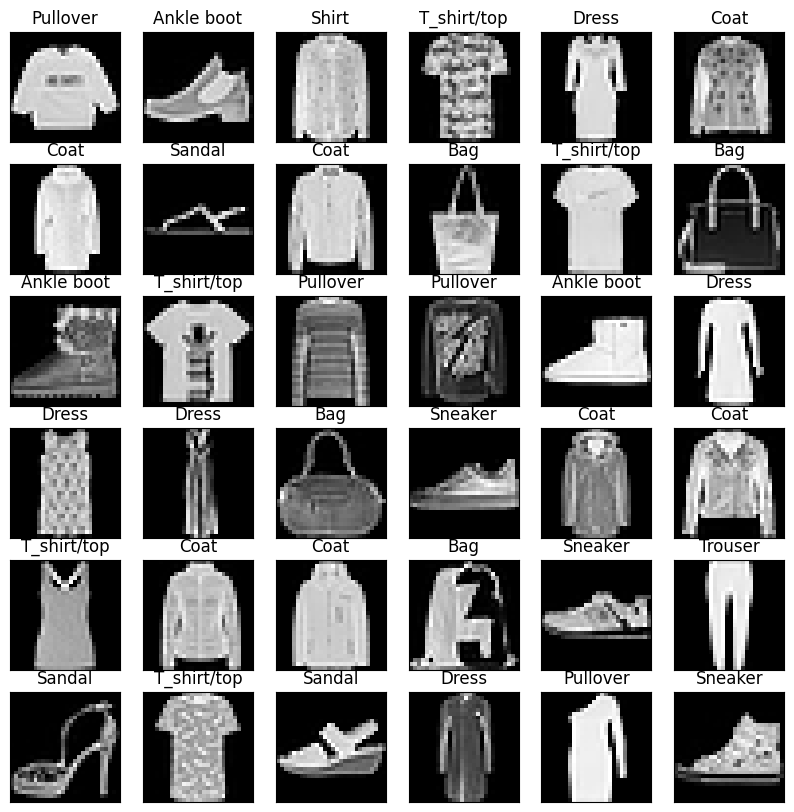

In [7]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i].reshape((28,28)),'gray')
    label_index = int(train_labels[i])
    plt.title(class_names[label_index])
plt.show()

In [7]:
image_rows = 28
image_cols = 28
image_shape = (image_rows,image_cols,1) 

In [8]:
x_train = train_data.reshape(train_data.shape[0],*image_shape)
x_test = test_data.reshape(test_data.shape[0],*image_shape)

In [9]:
x_test.shape

(10000, 28, 28, 1)

In [10]:
model=tf.keras.Sequential([tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=image_shape),
                          tf.keras.layers.MaxPooling2D((2,2)),
                           tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                           tf.keras.layers.MaxPooling2D((2,2)),
                           tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                           tf.keras.layers.MaxPooling2D((2,2)),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(256,activation='relu'),
                           tf.keras.layers.Dense(10,activation='softmax'),
])

In [11]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam',metrics =['accuracy'])

In [12]:
history = model.fit(x_train,train_labels,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 249s 163ms/step - loss: 0.6799 - accuracy: 0.7542 - val_loss: 0.5078 - val_accuracy: 0.8243
Epoch 2/10
1500/1500 [==============================] - 273s 182ms/step - loss: 0.4639 - accuracy: 0.8338 - val_loss: 0.4865 - val_accuracy: 0.8206
Epoch 3/10
1500/1500 [==============================] - 270s 180ms/step - loss: 0.4075 - accuracy: 0.8527 - val_loss: 0.3999 - val_accuracy: 0.8565
Epoch 4/10
1500/1500 [==============================] - 252s 168ms/step - loss: 0.3750 - accuracy: 0.8628 - val_loss: 0.4030 - val_accuracy: 0.8544
Epoch 5/10
1500/1500 [==============================] - 245s 163ms/step - loss: 0.3549 - accuracy: 0.8680 - val_loss: 0.3960 - val_accuracy: 0.8580
Epoch 6/10
1500/1500 [==============================] - 273s 182ms/step - loss: 0.3318 - accuracy: 0.8772 - val_loss: 0.3653 - val_accuracy: 0.8721
Epoch 7/10
1500/1500 [==============================] - 394s 263ms/step - loss: 0.3188 - accuracy: 0.8818 - val_

In [13]:
model.evaluate(x_test,test_labels)

313/313 [==============================] - 28s 85ms/step - loss: 0.3547 - accuracy: 0.8774


[0.35466185212135315, 0.8773999810218811]

Text(0.5, 1.0, 'Training - Accuracy')

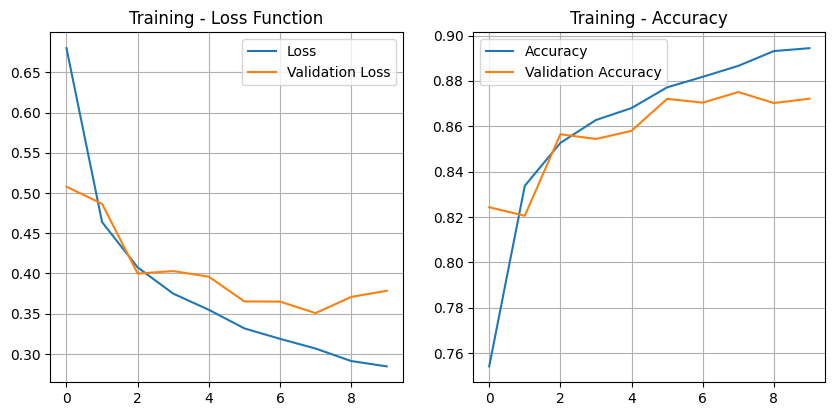

In [14]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.grid(True)
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.grid(True)
plt.title('Training - Accuracy')

# Saving and Loading the Trained Model

In [15]:
model.save('cnn_model.keras')

In [2]:
loaded_model = tf.keras.models.load_model('cnn_model.keras')

## Tesing with New Image

In [2]:
import cv2
import numpy as np

In [3]:
testing_image = cv2.imread('test.jpg')
gray_image = cv2.cvtColor(testing_image,cv2.COLOR_BGR2GRAY)
th,im  = cv2.threshold(gray_image,100,255,cv2.THRESH_BINARY_INV)
resized_image = cv2.resize(im,(28,28))
reshaped_image = resized_image.reshape(-1,28,28,1)
arr_image = np.array(reshaped_image,dtype='float32')
prediction = loaded_model.predict(arr_image)
print(np.argmax(prediction))

[ WARN:0@8.510] global loadsave.cpp:248 findDecoder imread_('test.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


# Building FastAPI With Streamlit Interface

In [ ]:
from fastapi import FastAPI, File, UploadFile
from fastapi.responses import JSONResponse


app = FastAPI()

# Load the model 
loaded_model = tf.keras.models.load_model('path_to_your_model.h5')

@app.post("/predict")
async def predict(file: UploadFile = File(...)):
    # Read and process the image file
    image_data = await file.read()
    testing_image = cv2.imdecode(np.frombuffer(image_data, np.uint8), cv2.IMREAD_UNCHANGED)
    gray_image = cv2.cvtColor(testing_image, cv2.COLOR_BGR2GRAY)
    _, im = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY_INV)
    resized_image = cv2.resize(im, (28, 28))
    reshaped_image = resized_image.reshape(-1, 28, 28, 1)
    arr_image = np.array(reshaped_image, dtype='float32')

    # Make a prediction
    prediction = loaded_model.predict(arr_image)
    predicted_class = int(np.argmax(prediction))

    return JSONResponse(content={'predicted_class': predicted_class})

# Run the app using Uvicorn
# Command: uvicorn your_script_name:app --reload

In [ ]:
import streamlit as st
import requests
# import cv2
# import numpy as np
from PIL import Image

st.title('CNN Image Classifier')

uploaded_file = st.file_uploader("Upload an image", type=['jpg', 'jpeg', 'png'])

def predict_image_class(image):
    # Convert the image to bytes and send it to the FastAPI endpoint
    files = {'file': image}
    response = requests.post("http://127.0.0.1:8000/predict", files=files)
    predicted_class = response.json()['predicted_class']
    return predicted_class

if uploaded_file is not None:
    # Convert uploaded file to OpenCV format
    image = np.array(Image.open(uploaded_file))
    st.image(image, caption='Uploaded Image', use_column_width=True)

    # Send image to FastAPI for prediction
    with open(uploaded_file.name, "rb") as img_file:
        predicted_class = predict_image_class(img_file)

    st.write(f"Predicted Class: {predicted_class}")
